In [1]:
# Importing the required libraries
import nfl_data_py as nfl
import pandas as pd

# Pulling data (for example, play-by-play data for 2023)
years = [2023]
pbp_data = nfl.import_pbp_data(years)

# Show the first few rows of the data
pbp_data.head()

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,NaN,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,0.0,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,NaN,None,None,None


In [2]:
# prevent truncation of output
# pd.options.display.max_rows = 20

# Checking for missing values
missing_values = pbp_data.isnull().sum()

# Checking the data types
data_types = pbp_data.dtypes

# Display column count
# print(len(data_types))

# Display results
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

print("\nData types of the columns:")
print(data_types)

Missing values in the dataset:
posteam                   2638
posteam_type              2638
defteam                   2638
side_of_field             3497
yardline_100              3460
                         ...  
time_to_throw            32905
was_pressure             32905
route                    33645
defense_man_zone_type    32875
defense_coverage_type    32875
Length: 294, dtype: int64

Data types of the columns:
play_id                  float32
game_id                   object
old_game_id_x             object
home_team                 object
away_team                 object
                          ...   
time_to_throw            float32
was_pressure             float32
route                     object
defense_man_zone_type     object
defense_coverage_type     object
Length: 391, dtype: object


In [3]:
# Dropping rows with missing values

# Define required columns (can add more later)
required_cols = ['play_id', 'game_id', 'old_game_id_x', 'home_team', 'away_team']
pbp_data_cleaned = pbp_data.dropna(subset=required_cols)

# Showing the first few rows of the cleaned dataset
pbp_data_cleaned.head()

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,NaN,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,0.0,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,NaN,None,None,None


In [4]:
# Getting summary statistics for numerical columns
summary_stats = pbp_data_cleaned.describe()

# Display summary statistics
summary_stats

,play_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,xyac_fd,xpass,pass_oe,defenders_in_box,number_of_pass_rushers,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure
count,49665.000000,49665.000000,46205.000000,49660.000000,49660.000000,49660.000000,49665.000000,49098.000000,49665.000000,49665.000000,...,17227.000000,37935.000000,36908.000000,32667.000000,19085.000000,43222.000000,43222.000000,16056.000000,16760.000000,16760.000000
mean,2179.316895,9.931219,48.958813,410.294556,806.015381,1711.851196,0.017497,11.580512,0.072606,2.559207,...,0.576909,0.630122,-0.863530,6.300793,4.320094,10.226852,10.224562,7.859604,2.802305,0.307637
std,1266.910400,5.601549,24.215456,282.918854,559.504822,1057.557983,0.131116,6.770356,0.259492,1.128486,...,0.355669,0.239563,42.286575,1.054569,0.770362,2.812088,2.812103,10.037359,1.099170,0.461529
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.009905,0.017802,-99.123466,0.000000,0.000000,0.000000,0.000000,-11.200000,0.414000,0.000000
25%,1093.000000,5.000000,32.000000,144.000000,279.000000,795.000000,0.000000,6.000000,0.000000,2.000000,...,0.242522,0.458300,-42.216351,6.000000,4.000000,11.000000,11.000000,1.350000,2.102000,0.000000
50%,2165.000000,10.000000,51.000000,390.000000,792.000000,1800.000000,0.000000,11.000000,0.000000,2.000000,...,0.476261,0.600256,4.065150,6.000000,4.000000,11.000000,11.000000,5.310000,2.603000,0.000000
75%,3249.000000,15.000000,70.000000,656.000000,1285.000000,2604.000000,0.000000,17.000000,0.000000,4.000000,...,0.999280,0.859109,33.784996,7.000000,5.000000,11.000000,11.000000,12.750000,3.270000,1.000000
max,5340.000000,22.000000,99.000000,900.000000,1800.000000,3600.000000,1.000000,34.000000,1.000000,5.000000,...,1.000000,0.996666,97.588158,11.000000,9.000000,13.000000,13.000000,62.700001,12.323000,1.000000


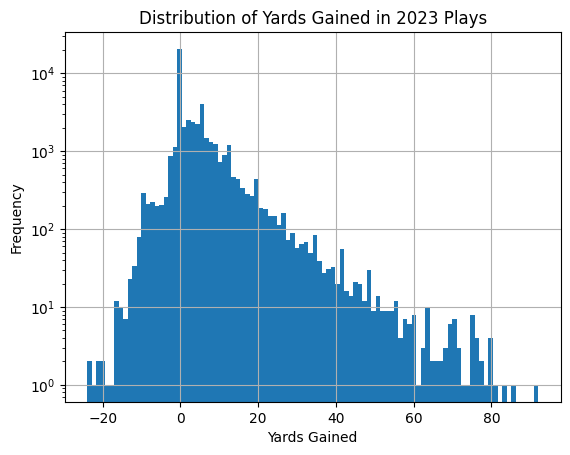

In [5]:
import matplotlib.pyplot as plt

# Plot histogram of yards gained
pbp_data_cleaned['yards_gained'].hist(bins=100)
plt.title('Distribution of Yards Gained in 2023 Plays')
plt.xlabel('Yards Gained')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

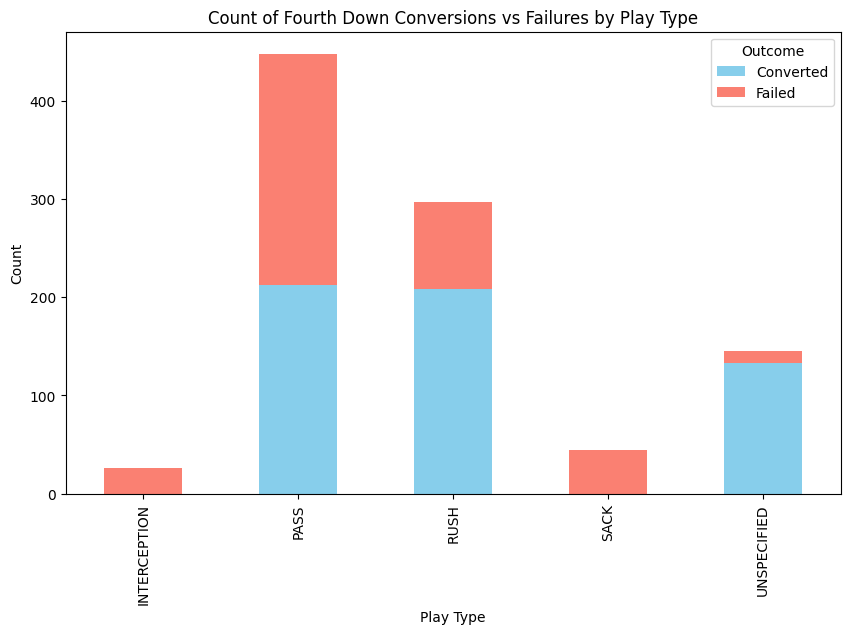

In [6]:
fourth_down_plays = pbp_data_cleaned[(pbp_data_cleaned['down'] == 4) & 
                                     (pbp_data_cleaned['play_type_nfl'].isin(['INTERCEPTION', 'PASS', 'RUSH', 'SACK', 'UNSPECIFIED']))]

# Calculate the counts of conversions and failures for each play type
play_counts = fourth_down_plays.groupby(['play_type_nfl', 'fourth_down_failed']).size().unstack(fill_value=0)

# Plot the stacked bar chart with actual counts
play_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Count of Fourth Down Conversions vs Failures by Play Type')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.legend(['Converted', 'Failed'], title='Outcome')
plt.show()

In [7]:
# Saving the cleaned data to a CSV file
pbp_data_cleaned.to_csv('pbp_data_cleaned_2023.csv', index=False)